In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.inspection import permutation_importance

data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='processed treated + untreated R')
data = data1.drop(['ID'], axis=1)

print(data.shape)

(178, 45)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pearson correlation coefficient for dp/dt max and Fulton Index: 0.5878
Pearson correlation coefficient for PVR and Fulton Index: 0.6033
Pearson correlation coefficient for Ees and Fulton Index: 0.4321


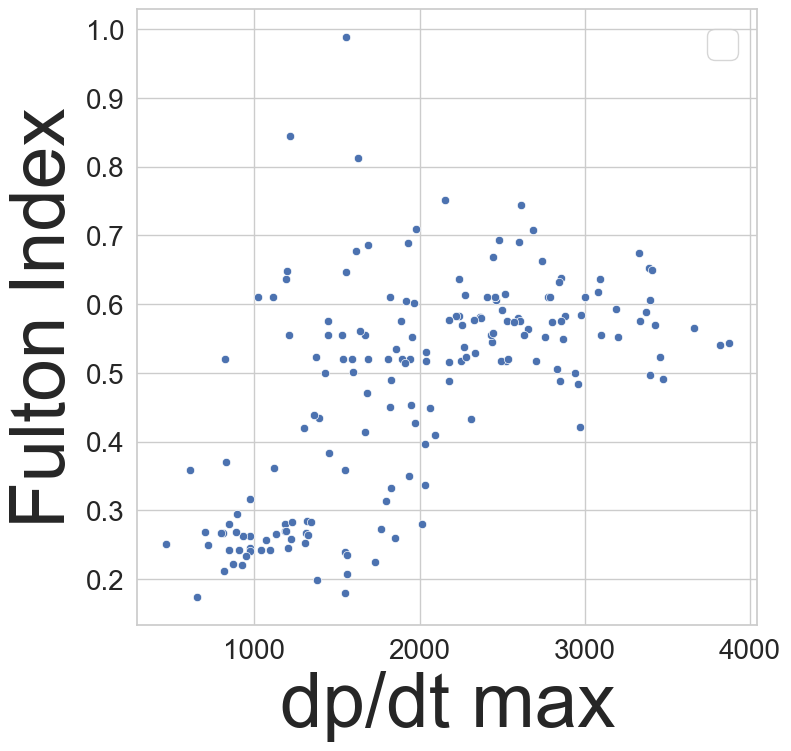

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


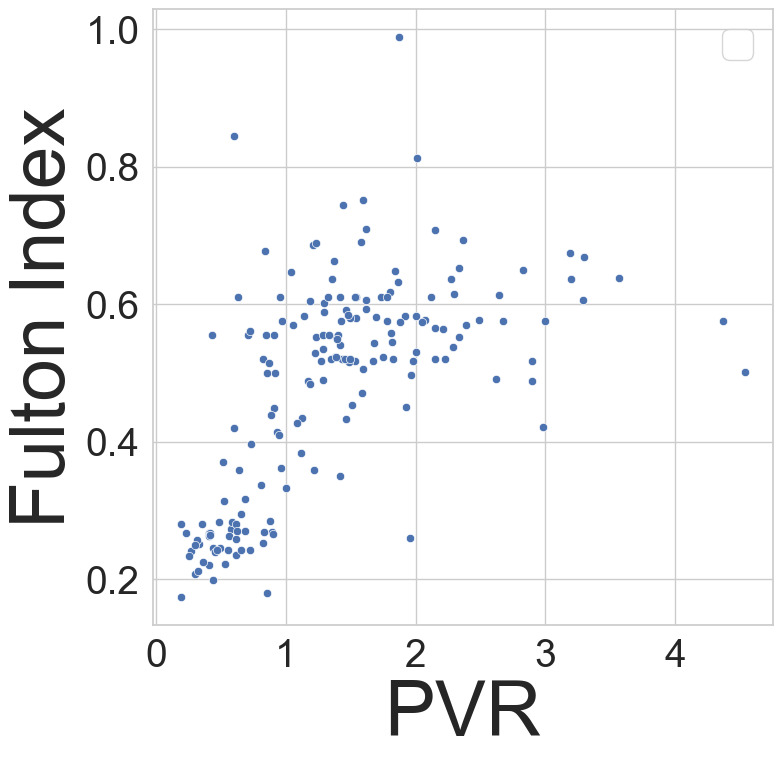

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


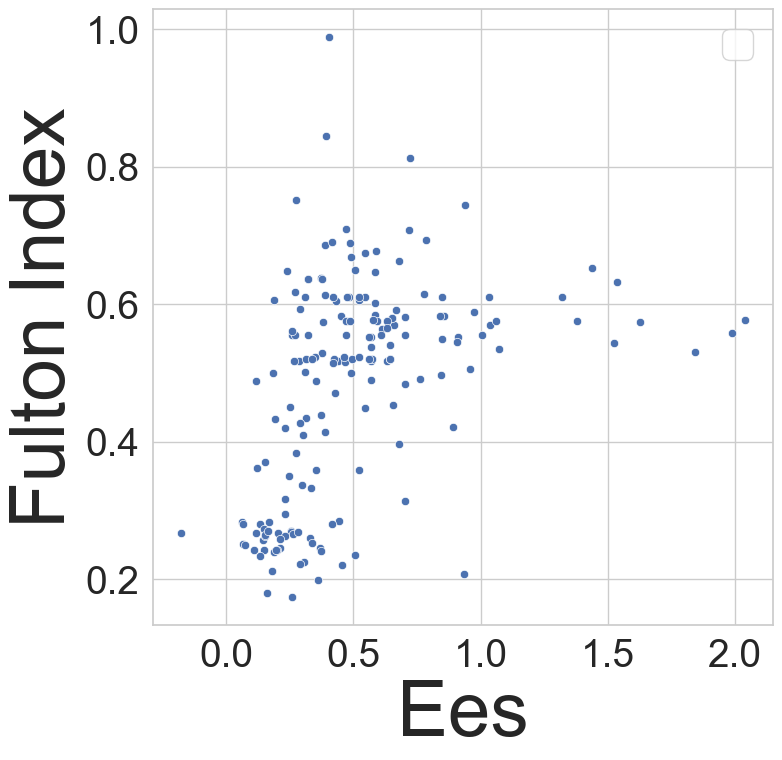

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming 'data' is your DataFrame
sns.set(style="whitegrid")  # Optional: Set a different style

# Function to calculate and print Pearson correlation coefficient
def calculate_pearson(x, y, data):
    # Calculate Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(data[x], data[y])
    
    # Display the correlation coefficient
    print(f"Pearson correlation coefficient for {x} and {y}: {correlation_coefficient:.4f}")

# Calculate Pearson correlation coefficient for Fulton Index and dp/dt max
calculate_pearson('dp/dt max', 'Fulton Index', data)

# Calculate Pearson correlation coefficient for Fulton Index and PVR
calculate_pearson('PVR', 'Fulton Index', data)

# Calculate Pearson correlation coefficient for Fulton Index and Ees
calculate_pearson('Ees', 'Fulton Index', data)

# Assuming 'data' is your DataFrame
sns.set(style="whitegrid")  # Optional: Set a different style

# Set a smaller figure size and make it square
plt.figure(figsize=(8, 8))

# Scatterplot for Fulton Index and dp/dt max
scatterplot = sns.scatterplot(x='dp/dt max', y='Fulton Index', data=data)
#plt.title('Fulton Index vs dp/dt max', fontsize=55)  # Adjust title fontsize
plt.xlabel('dp/dt max', fontsize=55)  # Adjust x-axis label fontsize
plt.ylabel('Fulton Index', fontsize=55)  # Adjust y-axis label fontsize

# Adjust tick label font size on both axes
scatterplot.tick_params(axis='both', which='major', labelsize=20)  # Adjust tick label font size

# Increase legend font size
scatterplot.legend(fontsize=28)

plt.show()

# Set another smaller figure size and make it square
plt.figure(figsize=(8, 8))

# Scatterplot for Fulton Index and PVR
scatterplot = sns.scatterplot(x='PVR', y='Fulton Index', data=data)
#plt.title('Fulton Index vs PVR', fontsize=55)
plt.xlabel('PVR', fontsize=55)
plt.ylabel('Fulton Index', fontsize=55)

# Adjust tick label font size on both axes
scatterplot.tick_params(axis='both', which='major', labelsize=28)

# Increase legend font size
scatterplot.legend(fontsize=28)

plt.show()

# Set another smaller figure size and make it square
plt.figure(figsize=(8, 8))

# Scatterplot for Fulton Index and PVR
scatterplot = sns.scatterplot(x='Ees', y='Fulton Index', data=data)
#plt.title('Fulton Index vs Ees', fontsize=55)
plt.xlabel('Ees', fontsize=55)
plt.ylabel('Fulton Index', fontsize=55)

# Adjust tick label font size on both axes
scatterplot.tick_params(axis='both', which='major', labelsize=28)

# Increase legend font size
scatterplot.legend(fontsize=28)

plt.show()


Accuracy: 1.00

Confusion Matrix:
[[ 7  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        20

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


Permutation Importances:
                Feature  Importance
20         Fulton Index    0.041975
10               AdjEDP    0.022222
19              RV Mass    0.013580
36          AdjEDP (LV)    0.008642
34             PVR (LV)    0.007407
9        Occlusion EDPo    0.006173
33       dp/dt min (LV)    0.004938
11               AdjESP    0.004938
12                  Ees    0.002469
30              EF (LV)    0.001235
41             VVC (LV)    0.001235
35  Occlusion EDPo (LV)    0.000000
24                  SHI    0.000000
37          AdjESP (LV)    0.000000
32       dp/dt max (LV)    0.0

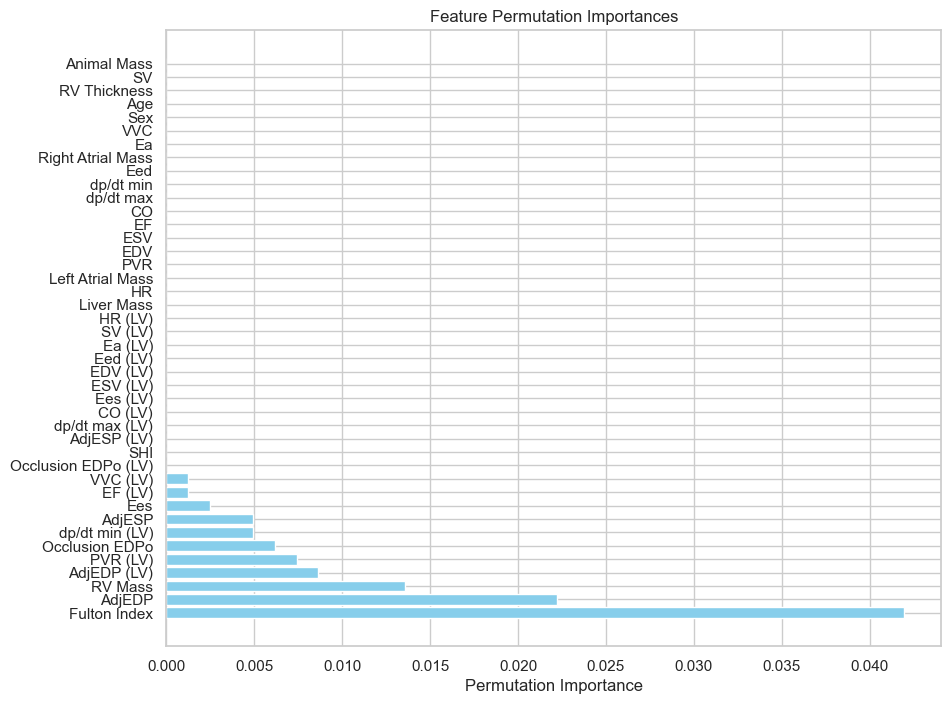

In [3]:
#prediction of controls VS treated (package 2)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load data
data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='processed treated + untreated R')
data = data1.drop(['ID'], axis=1)
data = data.drop(['PAH Induction (1 = sick)'], axis=1)
data = data.drop(['Weeks of Treatment'], axis=1)

# Extract features (X) and target variable (y)
X = data.iloc[:, 1:]  # Assuming the features start from the second column
y = data['GroundTruth (0 = untreated, 1 = treated)']

# Split the data into training and testing sets (90-10 ratio for both classes)
X_train_treated, X_test_treated, y_train_treated, y_test_treated = train_test_split(
    X[y == 1], y[y == 1], test_size=0.15, random_state=42
)

X_train_untreated, X_test_untreated, y_train_untreated, y_test_untreated = train_test_split(
    X[y == 0], y[y == 0], test_size=0.15, random_state=42
)

# Combine the training and testing sets for both classes
X_train = pd.concat([X_train_treated, X_train_untreated])
y_train = pd.concat([y_train_treated, y_train_untreated])
X_test = pd.concat([X_test_treated, X_test_untreated])
y_test = pd.concat([y_test_treated, y_test_untreated])

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')  # You can adjust hyperparameters like C and gamma

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': perm_importance.importances_mean}
)

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importances')
plt.show()


Best Hyperparameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.92

Confusion Matrix:
[[7 0]
 [1 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12


Permutation Importances:
              Feature  Importance
22  Right Atrial Mass    0.133333
23   Left Atrial Mass    0.075000
11             AdjESP    0.036111
20       Fulton Index    0.025000
18       RV Thickness    0.011111
0                  HR    0.000000
1                  SV    0.000000
21        Animal Mass    0.000000
17                Age    0.000000
16                Sex    0.000000
15                VVC    0.000000
14                 Ea    0.000000
13                Eed    0.000000
12                Ees    0.000000
10             A

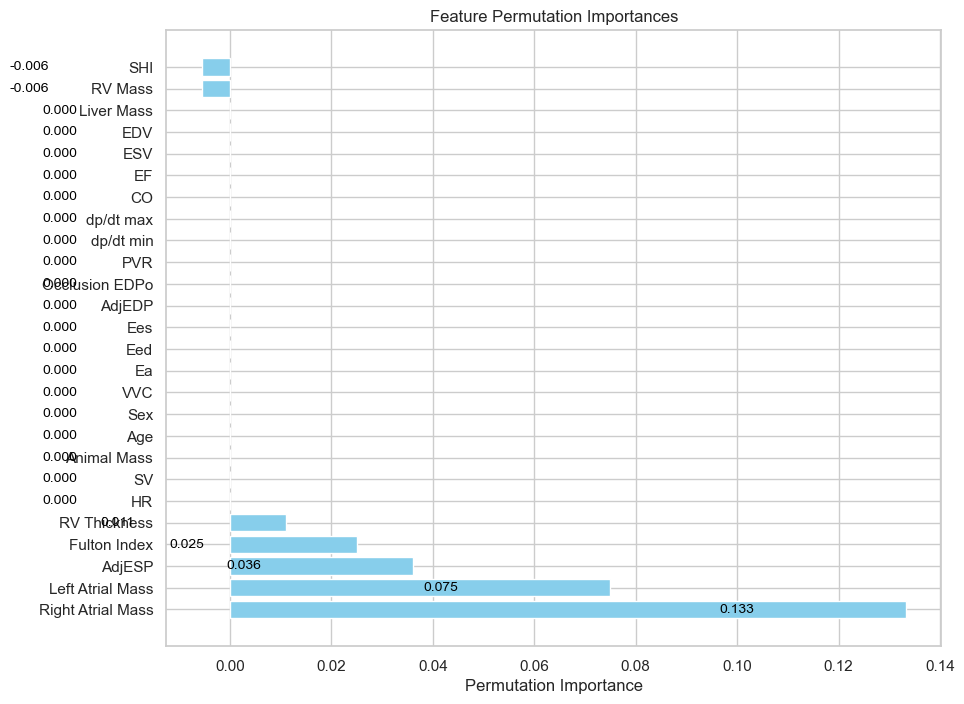

Total Absolute Permutation Importance: 0.292
Does the sum equal 1? No


In [6]:
# Healthy (predict treated or control) (package 2)

data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='Healthy (treated vs non-treated')
data = data1.drop(['PAH Induction (1 = sick)'], axis=1)
data = data.drop(['RAT Number'], axis=1)
data = data.drop(['Treatment and Notes'], axis=1)
data = data.drop(['Week post injection'], axis=1)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Extract features (X) and target variable (y)
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    best_svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': perm_importance.importances_mean}
)

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importances')

# Add labels to each bar
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', 
             va='center', ha='right', color='black', fontsize=10)

plt.show()

# Sum up the absolute values of permutation importances
total_abs_perm_importance = np.abs(perm_importance.importances_mean).sum()

# Check if the sum equals 1
print(f"Total Absolute Permutation Importance: {total_abs_perm_importance:.3f}")
print(f"Does the sum equal 1? {'Yes' if total_abs_perm_importance == 1 else 'No'}")



Accuracy: 1.00

Confusion Matrix:
[[ 5  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        26

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31


Permutation Importances:
              Feature  Importance
19       Fulton Index    0.065591
17       RV Thickness    0.038710
18            RV Mass    0.026882
12                Ees    0.023656
0                  HR    0.020430
11             AdjESP    0.019355
6           dp/dt max    0.017204
7           dp/dt min    0.013978
4                  EF    0.013978
20        Animal Mass    0.013978
22   Left Atrial Mass    0.011828
13                Eed    0.010753
9      Occlusion EDPo    0.009677
3                 ESV    0.008602
10             AdjEDP    0.007527
1                  SV    0

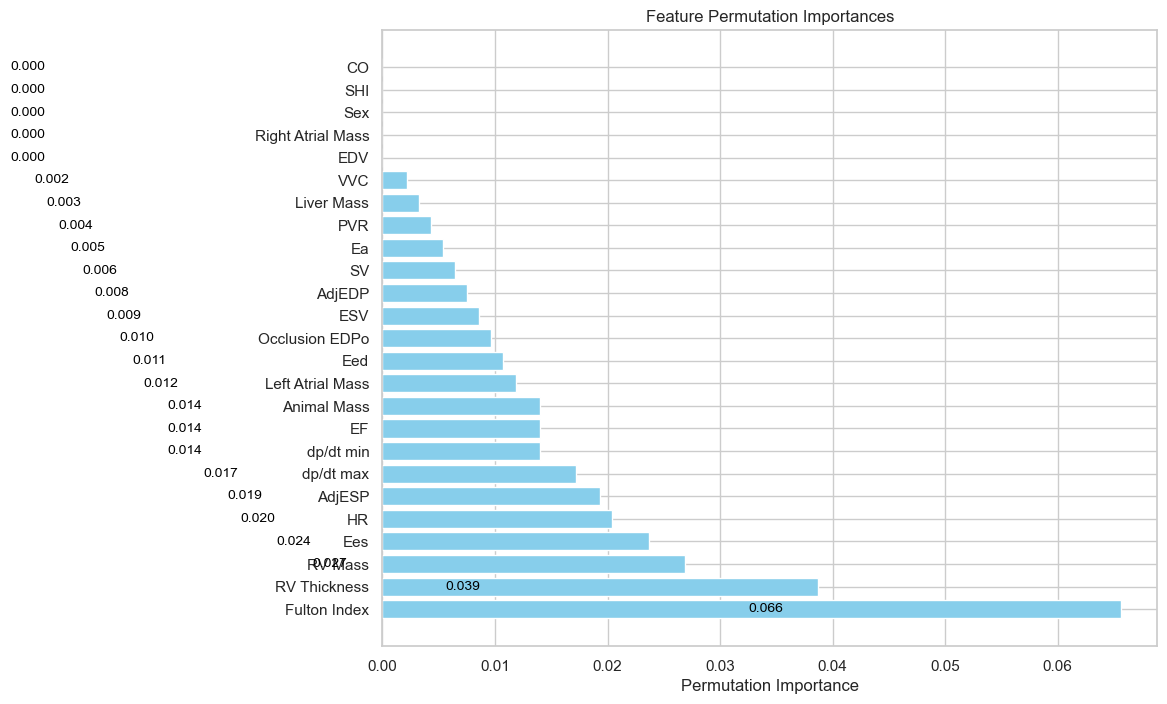

In [7]:
# predictive model for treated (sick VS unsick) package 2
data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='Treated (Sick VS Unsick)')
data = data1.drop(['GroundTruth (0 = untreated, 1 = treated)'], axis=1)
data = data.drop(['RAT Number'], axis=1)
data = data.drop(['Treatment and Notes'], axis=1)
data = data.drop(['Week post injection'], axis=1)
data = data.drop(['Age'], axis=1)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Extract features (X) and target variable (y)
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with RBF kernel for classification
svm_model = SVC(kernel='rbf', gamma='scale')  # You can adjust hyperparameters like C and gamma

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM for classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': perm_importance.importances_mean}
)

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importances')

# Add labels to each bar
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', 
             va='center', ha='right', color='black', fontsize=10)

plt.show()


Best Hyperparameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.70

Confusion Matrix:
[[12  0  0  0  0]
 [ 0  7  1  0  0]
 [ 0  0  7  2  1]
 [ 0  1  6  0  0]
 [ 0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           4       0.88      0.88      0.88         8
           8       0.50      0.70      0.58        10
          12       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         0

    accuracy                           0.70        37
   macro avg       0.47      0.52      0.49        37
weighted avg       0.65      0.70      0.67        37



c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Permutation Importances:
                                  Feature  Importance
18                           Fulton Index    0.136036
17                            RV Mass (g)    0.062162
23                   whole liver mass (g)    0.059459
15                                    Sex    0.052252
19                        Animal Mass (g)    0.050450
11                           Adjusted ESP    0.035135
7                       dP/dtmin (mmHg/s)    0.033333
13  Eed End-diastolic elastance (mmHg/uL)    0.032432
21                   Left atrium mass (g)    0.031532
14        Ea Arterial elastance (mmHg/uL)    0.030631
6                       dP/dtmax (mmHg/s)    0.025225
9                          Occlusion EDPo    0.018919
16              Average RV Thickness (mm)    0.017117
3                                ESV (µl)    0.011712
12   Ees End-systolic elastance (mmHg/uL)    0.005405
2                                EDV (µl)    0.003604
5                             CO (mL/min)    0.000901
1 

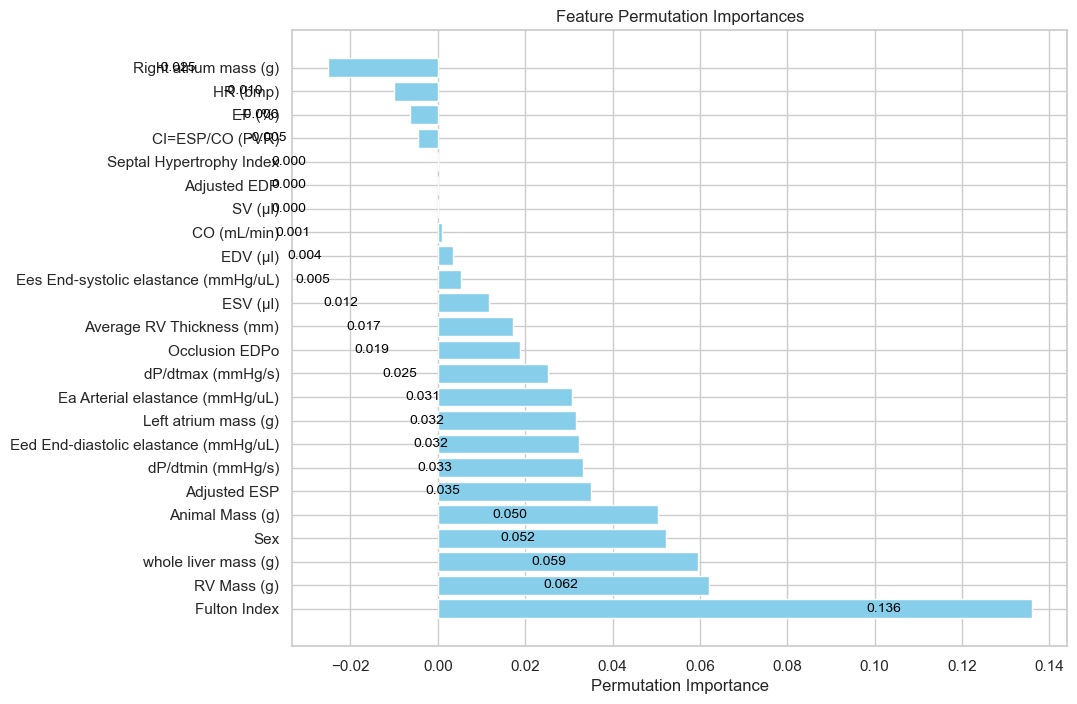

In [8]:
# predictive model for the number of weeks (package 1)

# Load data
data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='Week15')
data = data1.drop(['ID'], axis=1)
data = data.drop(['PAH Induction (1 = sick)'], axis=1)
data = data.drop(['GroundTruth (0 = untreated, 1 = treated)'], axis=1)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Extract features (X) and target variable (y)
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm_model = SVC(kernel='rbf', gamma='scale')

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM for classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    best_svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': perm_importance.importances_mean}
)

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importances')

# Add labels to each bar
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', 
             va='center', ha='right', color='black', fontsize=10)

plt.show()


Best Hyperparameters: {'gamma': 0.01}
Accuracy: 0.70

Confusion Matrix:
[[12  0  0  0]
 [ 0  4  4  0]
 [ 0  0 10  0]
 [ 1  2  4  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           4       0.67      0.50      0.57         8
           8       0.56      1.00      0.71        10
          12       0.00      0.00      0.00         7

    accuracy                           0.70        37
   macro avg       0.54      0.62      0.56        37
weighted avg       0.59      0.70      0.63        37



c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Permutation Importances:
                                  Feature  Importance
18                           Fulton Index    0.054054
15                                    Sex    0.031532
14        Ea Arterial elastance (mmHg/uL)    0.024324
0                                HR (bmp)    0.019820
19                        Animal Mass (g)    0.019820
8                         CI=ESP/CO (PVR)    0.018919
16              Average RV Thickness (mm)    0.016216
23                   whole liver mass (g)    0.015315
21                   Left atrium mass (g)    0.010811
7                       dP/dtmin (mmHg/s)    0.007207
12   Ees End-systolic elastance (mmHg/uL)    0.006306
17                            RV Mass (g)    0.006306
3                                ESV (µl)    0.002703
11                           Adjusted ESP    0.001802
9                          Occlusion EDPo    0.000901
2                                EDV (µl)    0.000901
10                           Adjusted EDP    0.000901
20

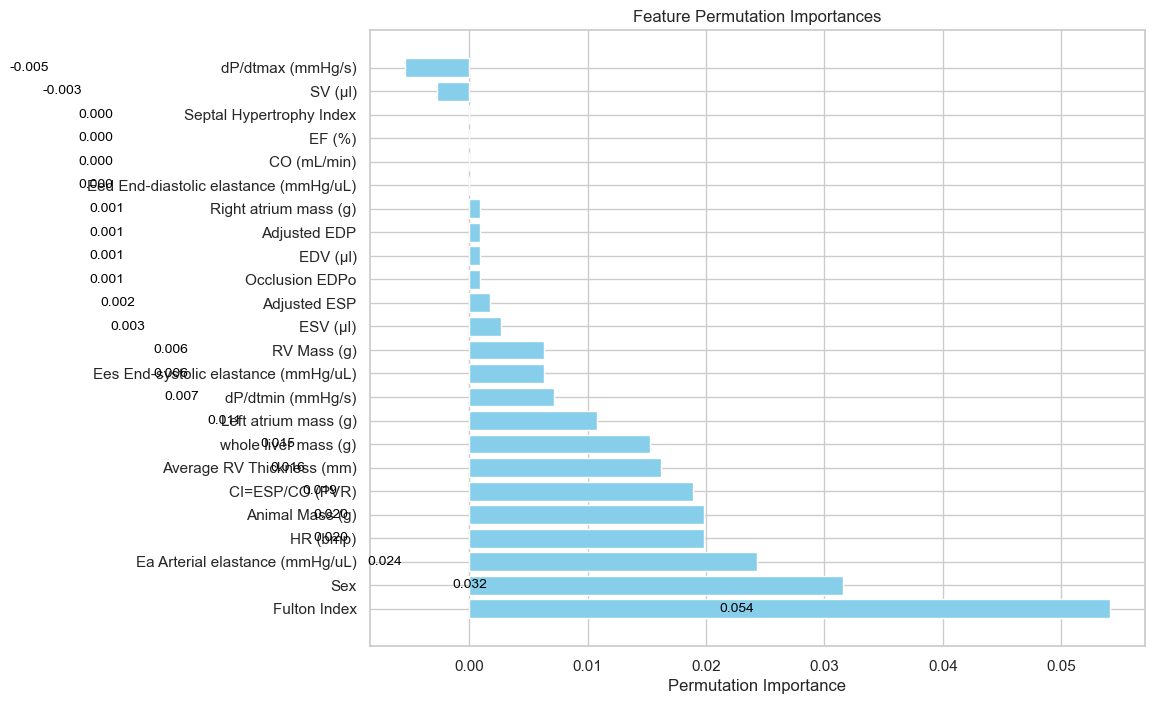

In [9]:
# predictive model for the number of weeks (package 1)

# Load data
data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='Week15')
data = data1.drop(['ID'], axis=1)
data = data.drop(['PAH Induction (1 = sick)'], axis=1)
data = data.drop(['GroundTruth (0 = untreated, 1 = treated)'], axis=1)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model with a sigmoid kernel
svm_model = SVC(kernel='sigmoid')

# Define the parameter grid for grid search
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(kernel='sigmoid', gamma=best_params['gamma'])
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM for classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    best_svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': perm_importance.importances_mean}
)

# Sort the DataFrame by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Permutation Importances')

# Add labels to each bar
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', 
             va='center', ha='right', color='black', fontsize=10)

plt.show()


Best Hyperparameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.70

Confusion Matrix:
[[12  0  0  0  0]
 [ 0  7  1  0  0]
 [ 0  2  5  2  1]
 [ 0  2  3  2  0]
 [ 0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           4       0.64      0.88      0.74         8
           8       0.56      0.50      0.53        10
          12       0.50      0.29      0.36         7
          15       0.00      0.00      0.00         0

    accuracy                           0.70        37
   macro avg       0.54      0.53      0.53        37
weighted avg       0.71      0.70      0.69        37



c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Permutation Importances:
    Feature  Importance
0         0    0.385586
1         1    0.088288
2         2    0.082883
3         3    0.002703
4         4    0.061261
5         5    0.079279
6         6    0.051351
7         7    0.064865
8         8    0.054955
9         9    0.126126
10       10    0.047748
11       11    0.081081
12       12    0.056757


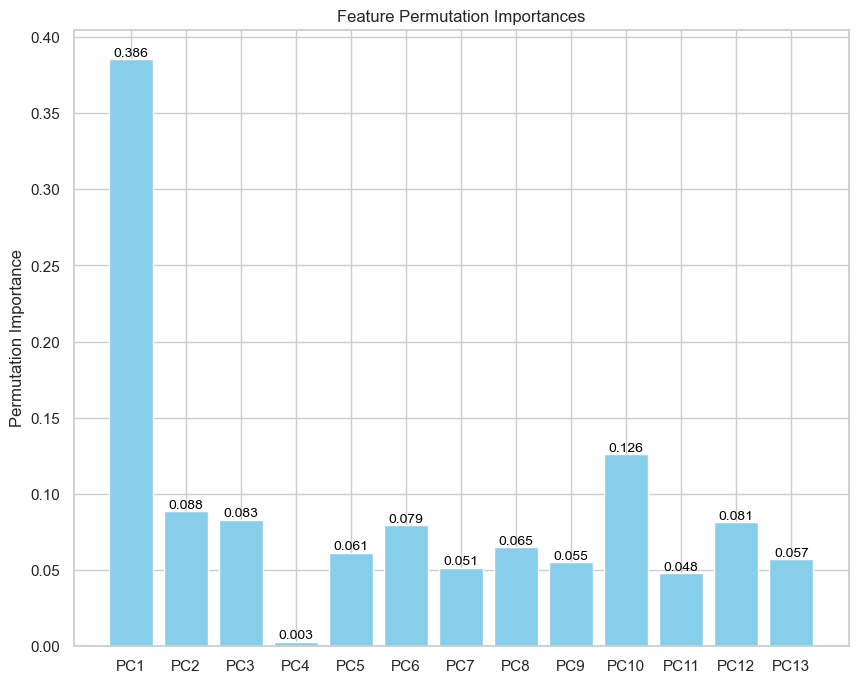

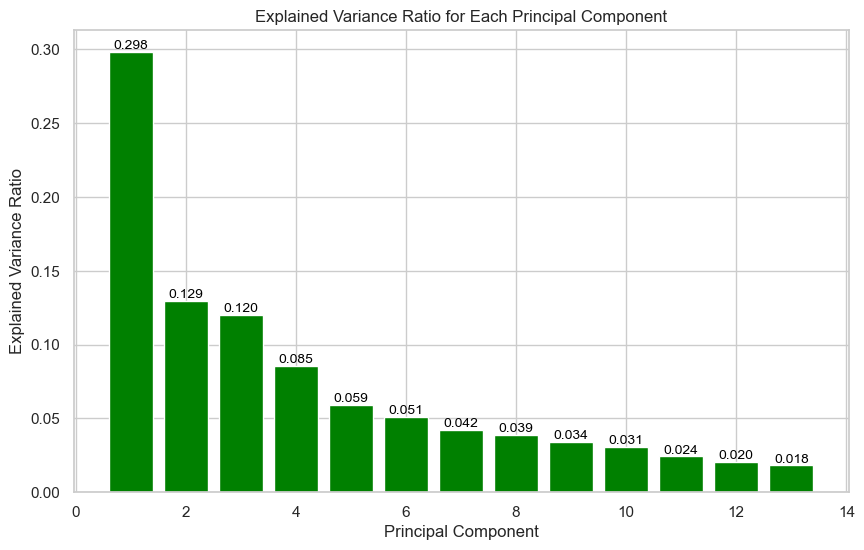

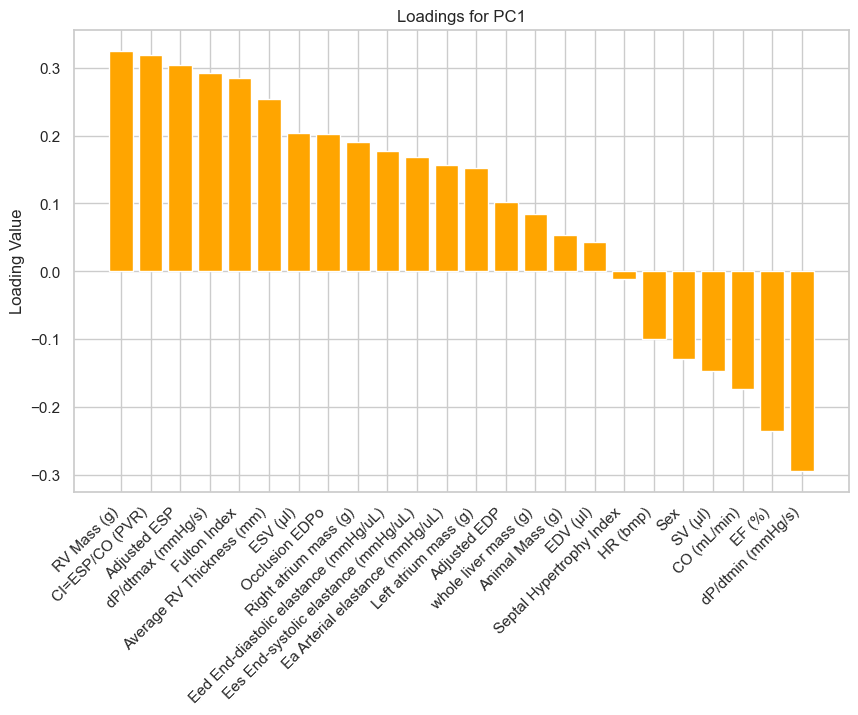


Top 5 Components and Loadings for PC1:
                    Loading
RV Mass (g)        0.325262
CI=ESP/CO (PVR)    0.318609
Adjusted ESP       0.304491
dP/dtmax (mmHg/s)  0.292811
Fulton Index       0.284722

Top 5 Components with Negative Loadings for PC1:
                    Loading
dP/dtmin (mmHg/s) -0.293647
EF (%)            -0.235118
CO (mL/min)       -0.173188
SV (µl)           -0.147010
Sex               -0.129599


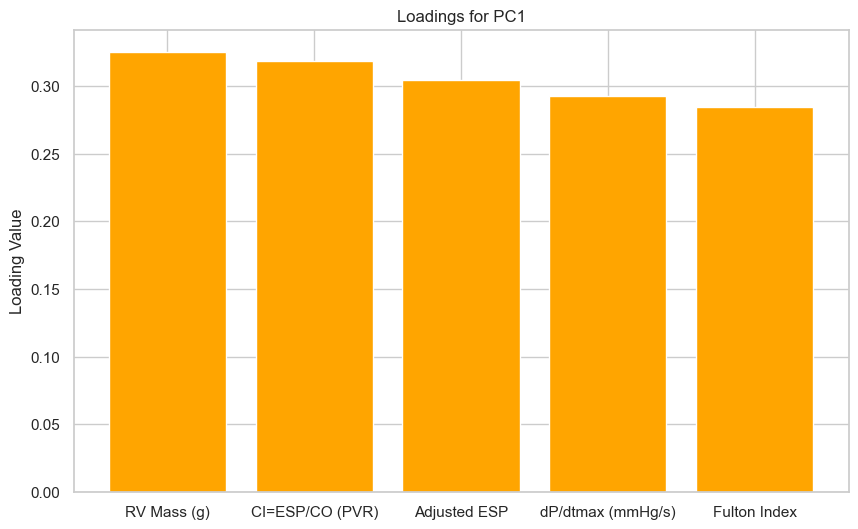

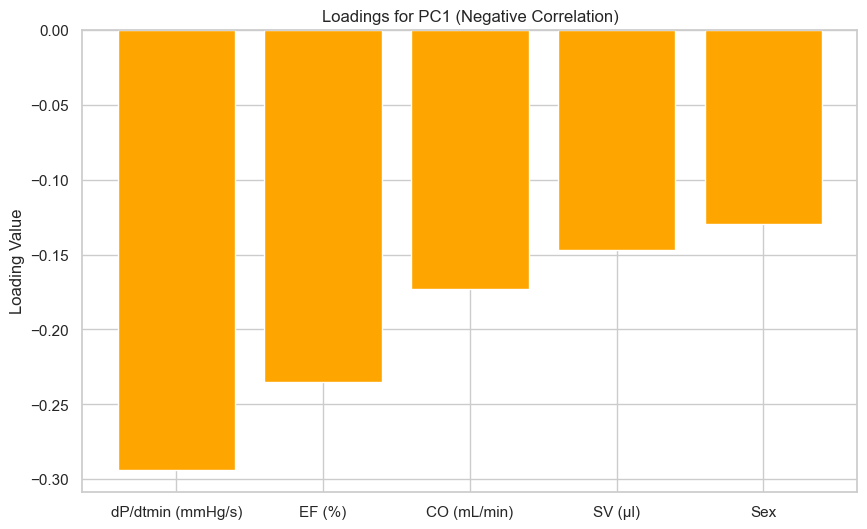

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data1 = pd.read_excel(r"C:\Users\jingw\Downloads\valdez-jasso lab\PAH Project Selected Predictors-preprocessed.xlsx", sheet_name='Week15')
data = data1.drop(['ID'], axis=1)
data = data.drop(['PAH Induction (1 = sick)'], axis=1)
data = data.drop(['GroundTruth (0 = untreated, 1 = treated)'], axis=1)

# Assuming 'data' is your DataFrame
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Choose the desired explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale')

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_pca)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    best_svm_model, X_test_pca, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': range(X_test_pca.shape[1]), 'Importance': perm_importance.importances_mean}
)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.bar(range(X_test_pca.shape[1]), perm_importance_df['Importance'], color='skyblue')
plt.ylabel('Permutation Importance')
plt.xticks(range(X_test_pca.shape[1]), [f'PC{i}' for i in range(1, X_test_pca.shape[1] + 1)])
plt.title('Feature Permutation Importances')

# Add labels to each bar with exact values
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.3f}', 
             va='bottom', ha='center', color='black', fontsize=10)

# Plotting the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='green')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')

# Add labels to each bar with exact values
for bar, value in zip(bars, pca.explained_variance_ratio_):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.3f}', 
             va='bottom', ha='center', color='black', fontsize=10)

# Show the loadings for the first principal component
loadings = pd.DataFrame(pca.components_[0], index=X.columns, columns=['Loading'])
loadings = loadings.sort_values(by='Loading', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(loadings.index, loadings['Loading'], color='orange')
plt.ylabel('Loading Value')
plt.title('Loadings for PC1')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the top 5 components and their loadings in a table
top5_loadings = loadings.head(5)
print("\nTop 5 Components and Loadings for PC1:")
print(top5_loadings)

# Plot bar graph for the first principal component loadings
plt.figure(figsize=(10, 6))
plt.bar(top5_loadings.index, top5_loadings['Loading'], color='orange')
plt.ylabel('Loading Value')
plt.title('Loadings for PC1')

# Show the loadings for the first principal component
loadings = pd.DataFrame(pca.components_[0], index=X.columns, columns=['Loading'])
loadings = loadings.sort_values(by='Loading', ascending=True)  # Sort in ascending order for negative correlation

# Display the top 5 components with negative loadings in a table
top5_negative_loadings = loadings.head(5)
print("\nTop 5 Components with Negative Loadings for PC1:")
print(top5_negative_loadings)

# Plot bar graph for the first principal component loadings with negative correlation
plt.figure(figsize=(10, 6))
plt.bar(top5_negative_loadings.index, top5_negative_loadings['Loading'], color='orange')
plt.ylabel('Loading Value')
plt.title('Loadings for PC1 (Negative Correlation)')
plt.show()


Best Hyperparameters: {'C': 100, 'gamma': 0.01}
Accuracy: 0.67

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  5  0  0]
 [ 0  1  9  0  3]
 [ 0  2  4  1  0]
 [ 0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           4       0.67      0.55      0.60        11
           8       0.50      0.69      0.58        13
          12       1.00      0.14      0.25         7
          15       0.00      0.00      0.00         0

    accuracy                           0.67        46
   macro avg       0.63      0.48      0.49        46
weighted avg       0.78      0.67      0.67        46



c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jingw\Downloads\Bioinformatics\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Permutation Importances:
    Feature  Importance
0         0    0.334058
1         1    0.125362
2         2    0.035507
3         3   -0.009420
4         4    0.018116
5         5    0.051449
6         6    0.058696
7         7    0.018841
8         8   -0.026087
9         9    0.065217
10       10    0.026812
11       11   -0.025362
12       12    0.068116


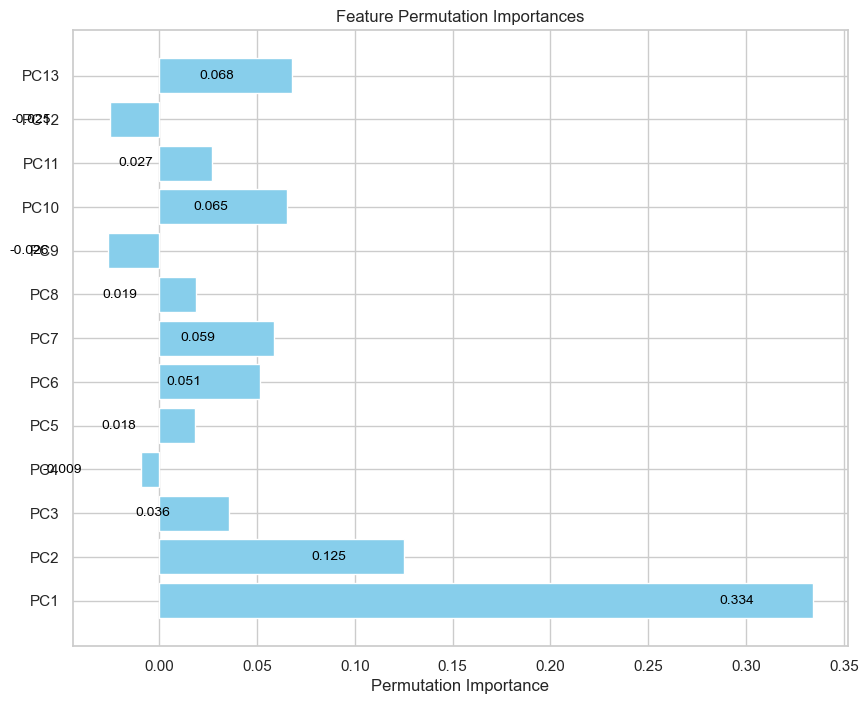

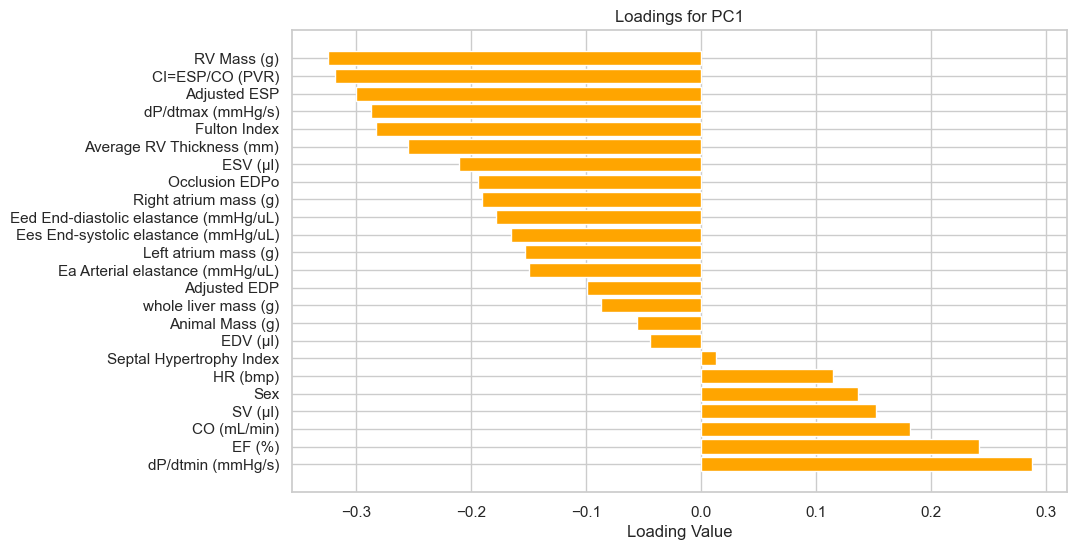

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
X = data.iloc[:, 1:]  # Assuming features start from the second column
y = data.iloc[:, 0]  # Assuming the first column is the target variable

# Split the data into training and testing sets (75-25 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Choose the desired explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM model with Sigmoid kernel
svm_model = SVC(kernel='sigmoid', gamma='scale')

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_model = SVC(kernel='sigmoid', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test_pca)

# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate permutation importances
perm_importance = permutation_importance(
    best_svm_model, X_test_pca, y_test, n_repeats=30, random_state=42
)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame(
    {'Feature': range(X_test_pca.shape[1]), 'Importance': perm_importance.importances_mean}
)

# Display the permutation importances
print("\nPermutation Importances:")
print(perm_importance_df)

# Plot bar graph for permutation importances with labels
plt.figure(figsize=(10, 8))
bars = plt.barh(range(X_test_pca.shape[1]), perm_importance_df['Importance'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.yticks(range(X_test_pca.shape[1]), [f'PC{i}' for i in range(1, X_test_pca.shape[1] + 1)])
plt.title('Feature Permutation Importances')

# Add labels to each bar
for bar, value in zip(bars, perm_importance_df['Importance']):
    plt.text(bar.get_width() - 0.03, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', 
             va='center', ha='right', color='black', fontsize=10)

# Show the loadings for the first principal component
loadings = pd.DataFrame(pca.components_[0], index=X.columns, columns=['Loading'])
loadings = loadings.sort_values(by='Loading', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(loadings.index, loadings['Loading'], color='orange')
plt.xlabel('Loading Value')
plt.title('Loadings for PC1')
plt.show()


In [16]:
# Assuming 'data' is your DataFrame with the binary variable in column 1
# Adjust this based on your actual dataset
# Replace 'target_variable' with the actual name of your binary variable
X = data.drop('GroundTruth (0 = untreated, 1 = treated)', axis=1)
y = data['GroundTruth (0 = untreated, 1 = treated)']

# Split the data into training (90%) and testing (10%) sets, maintaining the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with Radial Basis Function (RBF) kernel
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Add the predicted labels to the test set
X_test['predicted_labels'] = y_pred

# Use Seaborn pair plot to visualize decision boundaries
# sns.set(style="whitegrid", palette="husl")
# sns.pairplot(X_test, hue='predicted_labels', markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
# plt.show()

Confusion Matrix:
[[ 5  0]
 [ 0 13]]

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



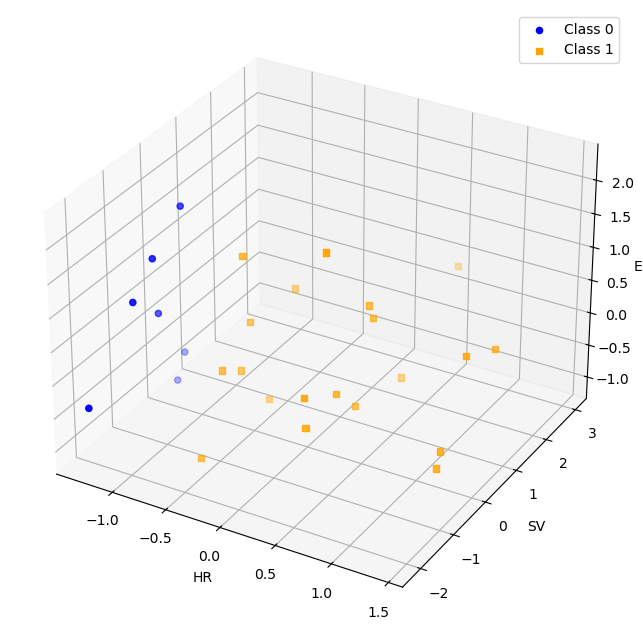

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Predict labels for the test set
#y_pred = svm_model.predict(X_test_scaled)

# Scatter plot for class 0
class_0_indices = y_pred == 0
ax.scatter(X_test_scaled[class_0_indices][:, 0], X_test_scaled[class_0_indices][:, 1], X_test_scaled[class_0_indices][:, 2], c='blue', marker='o', label='Class 0')

# Scatter plot for class 1
class_1_indices = y_pred == 1
ax.scatter(X_test_scaled[class_1_indices][:, 0], X_test_scaled[class_1_indices][:, 1], X_test_scaled[class_1_indices][:, 2], c='orange', marker='s', label='Class 1')

# Set labels for each axis
ax.set_xlabel('HR')
ax.set_ylabel('SV')
ax.set_zlabel('EDV')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()

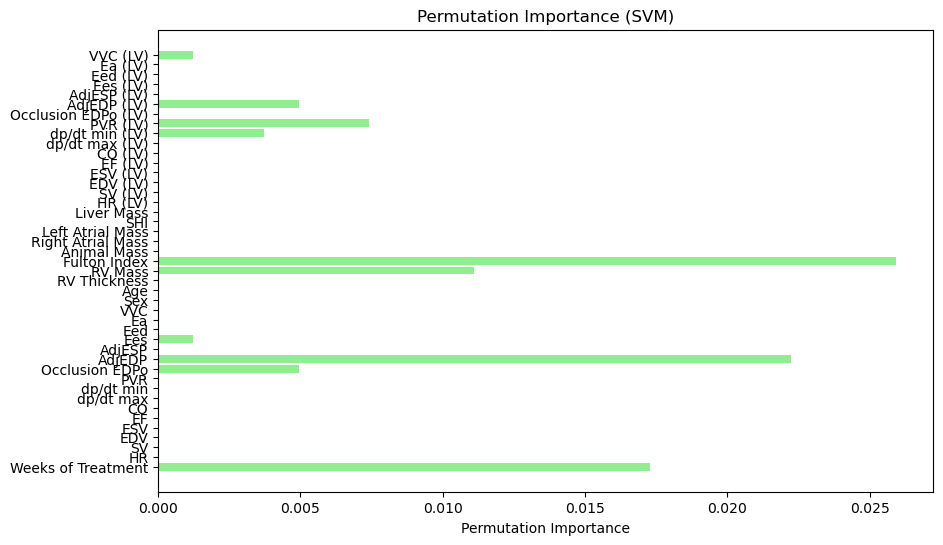

In [28]:
# Assuming 'svm_model' is your trained SVM model
perm_importance = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Visualize permutation importance
importance_scores = perm_importance.importances_mean
feature_names = X.columns

# Create a bar plot of permutation importance scores
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores, color='lightgreen')
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (SVM)')
plt.show()

     GroundTruth (0 = untreated, 1 = treated)          HR          SV  \
0                                           0  309.278350   52.077945   
1                                           0  205.983325  218.794256   
2                                           0  311.633193  123.603056   
3                                           0  235.976207  146.236817   
4                                           0  284.618490  191.864834   
..                                        ...         ...         ...   
173                                         1  308.518168  205.338489   
174                                         1  262.461728  127.135631   
175                                         1  278.657712  106.322888   
176                                         1  250.398583  227.940565   
177                                         1  261.614785  113.118008   

            EDV         ESV         EF         CO    dp/dt max    dp/dt min  \
0     98.605734   46.527789  52.814317  16.1

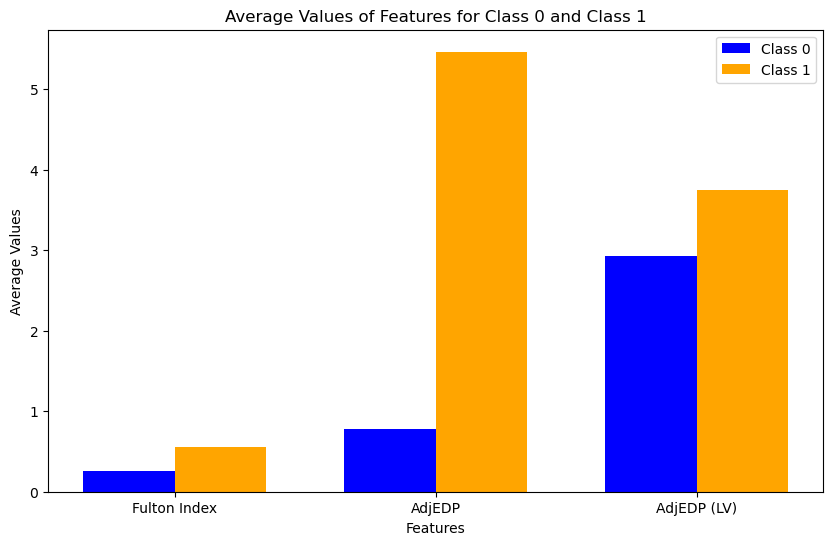

In [12]:
data2 = data1.drop(['ID'], axis=1)
print(data2)


# Assuming 'data2' is your DataFrame
# Assuming the first column is named 'Class', 'Fulton Index', 'AdjEDP', 'RV Mass'

# Separate the data into two groups based on the 'Class' column
class_0_data = data2[data2['GroundTruth (0 = untreated, 1 = treated)'] == 0]
class_1_data = data2[data2['GroundTruth (0 = untreated, 1 = treated)'] == 1]

# Calculate the average values for each column in each class
avg_class_0 = class_0_data[['Fulton Index', 'AdjEDP', 'AdjEDP (LV)']].mean()
avg_class_1 = class_1_data[['Fulton Index', 'AdjEDP', 'AdjEDP (LV)']].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(avg_class_0))

bar1 = ax.bar(index, avg_class_0, bar_width, label='Class 0', color='blue')
bar2 = ax.bar([i + bar_width for i in index], avg_class_1, bar_width, label='Class 1', color='orange')

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Average Values')
ax.set_title('Average Values of Features for Class 0 and Class 1')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(['Fulton Index', 'AdjEDP', 'AdjEDP (LV)'])

# Add legend
ax.legend()

# Show the plot
plt.show()